# Exploring Disney Land Wait Time Data Set
## Loading libraries and reading in data

In [1]:
import pandas as pd ## call pandas functions using "pd"
import numpy as np  ## call numpy functions using "np"

import sklearn.decomposition as skld

import matplotlib.pyplot as plt
import seaborn as sns
import imp
import matplotlib.dates as mdates

#import meta data
meta = pd.read_csv("disney.csv")

#import magic kingdom rides (wait times)
splash = pd.read_csv("splash_mountain.csv")
seven_dwarfs = pd.read_csv("7_dwarfs_train.csv")
pirates = pd.read_csv('pirates_of_caribbean.csv')

### Viewing the meta Dataset

In [2]:
print(meta.shape) #190 columns, 2674 rows of observations
#First five rows of meta, five columns, 
# start date 2012
meta.iloc[0:5, 0:10]

(2674, 190)


,DATE,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,HOLIDAYM
0,01/01/2012,NaN,1,0,1,1,2012,CHRISTMAS PEAK,0,5
1,01/02/2012,NaN,2,1,1,1,2012,CHRISTMAS,2,5
2,01/03/2012,NaN,3,2,1,1,2012,CHRISTMAS,3,0
3,01/04/2012,NaN,4,3,1,1,2012,CHRISTMAS,4,0
4,01/05/2012,NaN,5,4,1,1,2012,CHRISTMAS,5,0


In [3]:
# Drop rows where wait time is not available (-999)
pirates = pirates[pirates.SPOSTMIN > 0]
seven_dwarfs = seven_dwarfs[seven_dwarfs.SPOSTMIN > 0]
splash = splash[(splash.SPOSTMIN > 0) | (splash.SACTMIN > 0)]

splash.head() #has posted minutes for each ride

,date,datetime,SPOSTMIN,SACTMIN
0,01/01/2012,2012-01-01 10:31:00,30.0,NaN
1,01/01/2012,2012-01-01 10:40:00,30.0,NaN
2,01/01/2012,2012-01-01 10:32:00,NaN,13.0
3,01/01/2012,2012-01-01 12:02:00,30.0,NaN
4,01/01/2012,2012-01-01 12:04:00,NaN,23.0


## Merging datasets together to include wait times for Splash Mountain

In [4]:
#Merging each ride with meta_data, using date as key
meta_splash = pd.merge(splash, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)

In [5]:
#change NAs to 0 values
meta_splash = meta_splash.fillna(0)
#format date in a way that can be worked with
meta_splash['date'] = pd.to_datetime(meta_splash['date'])
meta_splash.head()

,date,datetime,SPOSTMIN,SACTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2012-01-01,2012-01-01 10:31:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
1,2012-01-01,2012-01-01 10:40:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
2,2012-01-01,2012-01-01 10:32:00,0.0,13.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
3,2012-01-01,2012-01-01 12:02:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
4,2012-01-01,2012-01-01 12:04:00,0.0,23.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0


In [13]:
#Getting average wait times per day:

#find all posted/actual wait times by day in meta_splash
sum_by_day = meta_splash.groupby('date')[('SPOSTMIN','SACTMIN')].mean()
#reset index to create dataframe columns
sum_by_day = sum_by_day.reset_index()
#sum_by_day = pd.DataFrame(sum_by_day,columns=['date','SPOSTMIN'])

sum_by_day.head()

,date,SPOSTMIN,SACTMIN
0,2012-01-01,31.923077,2.769231
1,2012-01-02,43.750000,0.000000
2,2012-01-03,5.000000,0.000000
3,2012-01-04,15.000000,2.500000
4,2012-01-05,33.437500,1.250000


In [14]:
#Merging these wait times back into meta dataset and fill 0 for NA
#For splash 
meta['DATE'] = pd.to_datetime(meta['DATE'])
meta_splash2 = pd.merge(sum_by_day, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)
# change month and day to names of month and day ie: 1 to Sunday, 1 to January
meta_splash2['DAY'] = meta_splash2['date'].dt.weekday_name
meta_splash2['MONTH'] = meta_splash2['date'].dt.month_name()
meta_splash2 = meta_splash2.fillna(0)

meta_splash2.head()

,date,SPOSTMIN,SACTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,...,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN,DAY,MONTH
0,2012-01-01,31.923077,2.769231,0,1,0,1,1,2012,CHRISTMAS PEAK,...,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0,Sunday,January
1,2012-01-02,43.750000,0.000000,0,2,1,1,1,2012,CHRISTMAS,...,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0,Monday,January
2,2012-01-03,5.000000,0.000000,0,3,2,1,1,2012,CHRISTMAS,...,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0,Tuesday,January
3,2012-01-04,15.000000,2.500000,0,4,3,1,1,2012,CHRISTMAS,...,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0,Wednesday,January
4,2012-01-05,33.437500,1.250000,0,5,4,1,1,2012,CHRISTMAS,...,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0,Thursday,January


In [ ]:
ax = sns.barplot(x = "date", y = ["SPOSTMIN","SACTMIN"],data = meta_splash2)
ax.set_title("Average Wait Time by Day per Year")
ax.set(xlabel='Date', ylabel='Average Attendance by Minute')
plt.xticks(rotation = 90)

In [21]:
#aggregate by year
year_splash = meta_splash2.groupby(['YEAR'])['SPOSTMIN','SACTMIN'].mean()
year_splash = year_splash.reset_index()
year_splash.head()

,YEAR,SPOSTMIN,SACTMIN
0,2012,31.811774,1.047546
1,2013,33.951358,0.352453
2,2014,32.900673,0.453503
3,2015,32.931315,0.520324
4,2016,36.014788,0.505063


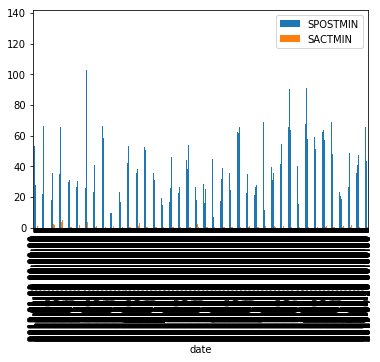

In [19]:
#plot by day 
meta_splash2.plot(x="date", y=["SPOSTMIN", "SACTMIN"], kind="bar")

### Correlation between SPOSTMIN & Predictors

In [ ]:
## Running same code on all of metasplash_2
meta_splash2_corr = meta_splash2.corr()['SPOSTMIN'][:-2]
golden_features_list_2 = meta_splash2_corr[abs(meta_splash2_corr) > 0.25].sort_values(ascending=False)
print("There is {} strongly correlated values with SPOSTMIN:\n{}".format(len(golden_features_list_2), golden_features_list_2))

## Visualizations

#### Wait time by Week 

In [ ]:
week_avg = meta_splash2.groupby("WEEKOFYEAR")["SPOSTMIN"].mean()
week_avg = week_avg.reset_index()
week_avg = pd.DataFrame(week_avg,columns=['WEEKOFYEAR','SPOSTMIN'])
ax = sns.barplot(x = "WEEKOFYEAR", y = "SPOSTMIN", data = week_avg)
ax.set_title("Average Attendace by Week of the Year")
ax.set(xlabel='Week of the Year', ylabel='Average Attendance by Minute')
plt.xticks(rotation = 90)

In [ ]:
# Grouping by week and year

#aggregate by month
week_splash2 = meta_splash2.groupby(['WEEKOFYEAR', 'YEAR'])['SPOSTMIN'].mean().reset_index()

week_splash2 = week_splash2.pivot("WEEKOFYEAR", "YEAR", "SPOSTMIN").iloc[:,0:7]
ax = sns.heatmap(week_splash2)

#### Temperature vs Wait Time

In [ ]:
meta_splash2.WDWMINTEMP_mean = meta_splash2.WDWMINTEMP_mean.round()
avg_temp = meta_splash2.groupby("WDWMINTEMP_mean")["SPOSTMIN"].mean()
avg_temp = avg_temp.reset_index()
avg_temp = pd.DataFrame(avg_temp,columns=['WDWMINTEMP_mean','SPOSTMIN'])


ax = sns.barplot(x = "WDWMINTEMP_mean", y = "SPOSTMIN", data = avg_temp)
ax.set_title("Average Attendace by Temperature")
ax.set(xlabel='Temperature', ylabel='Average Attendance by Minute')
plt.xticks(rotation = 90)

In [ ]:
# Grouping by temperature and year

#aggregate by month
temp_splash2 = meta_splash2.groupby(['WDWMINTEMP_mean', 'YEAR'])['SPOSTMIN'].mean().reset_index()

temp_splash2 = temp_splash2.pivot("WDWMINTEMP_mean", "YEAR", "SPOSTMIN")
temp_splash2
ax = sns.heatmap(temp_splash2)

#### Park Hour vs Wait Time 

In [ ]:
park_hour_df = meta_splash2[['SPOSTMIN','MKHOURS','MKOPEN','MKCLOSE','SEASON']]
#park_hour_df = park_hour_df[park_hour_df.MKHOURS != 14.91666667]
#park_hour_df = park_hour_df[park_hour_df.MKHOURS != 23.98333333]
park_hour_df.MKHOURS = park_hour_df.MKHOURS.round()
park_hour_df.MKHOURS.unique()

In [ ]:
park_hour_df = meta_splash2[['SPOSTMIN','MKHOURS','MKOPEN','MKCLOSE','SEASON']]
#park_hour_df = park_hour_df[park_hour_df.MKHOURS != 14.91666667]
#park_hour_df = park_hour_df[park_hour_df.MKHOURS != 23.98333333]
park_hour_df.MKHOURS = park_hour_df.MKHOURS.round()
park_hour_df.MKHOURS.unique()

park_hour_df = park_hour_df.groupby("MKHOURS")["SPOSTMIN"].mean()
park_hour_df = park_hour_df.reset_index()
park_hour_df.head(n=3)
#park_hour_df = pd.DataFrame(avg_temp,columns=['MKHOURS','SPOSTMIN','SEASON'])


ax = sns.barplot(x = "MKHOURS", y = "SPOSTMIN", data = park_hour_df)
ax.set_title("Average Attendace by Park Hour")
ax.set(xlabel='Park Hour', ylabel='Average Attendance by Minute')

In [ ]:
meta_splash3 = meta_splash2
meta_splash3.MKHOURS = meta_splash3.MKHOURS.round()
park_h_splash2 = meta_splash3.groupby(['MKHOURS', 'YEAR'])['SPOSTMIN'].mean().reset_index()

park_h_splash2 = park_h_splash2.pivot("MKHOURS", "YEAR", "SPOSTMIN")
ax = sns.heatmap(park_h_splash2)

#### Plotting Average Waittime by season

In [ ]:
#Plotting by season
#First getting number of counts of observations per season:
print(meta_splash2.groupby('SEASON')['date'].count())

seasonal_splash = meta_splash2.groupby('SEASON')['SPOSTMIN'].mean().reset_index()
seasonal_splash

In [ ]:
#Plot splash wait times by season:
ax = sns.barplot(x="SPOSTMIN", y = "SEASON", data = seasonal_splash)
ax.set(xlabel = 'Average Wait Time (Minutes)', ylabel = 'SEASON', title = 'Average Wait Time for Splash Mountain by Season')
plt.xticks(rotation = 45)

#### Average Wait Time Per Month for Splash Mountain Ride
We see that on average wait times are the longest during peak summer months of July, June

In [ ]:
# Grouping by month and year

#aggregate by month
month_splash2 = meta_splash2.groupby(['MONTH', 'YEAR'])['SPOSTMIN'].mean().reset_index()
month_splash2 = month_splash2.pivot("MONTH", "YEAR", "SPOSTMIN").iloc[:,0:7] # Position based indexing

ax = sns.heatmap(month_splash2, cmap="YlGnBu")
ax.set_title('Splash Mountain Heatmap Month & Year')

White indicates when Magic Mountain was shut down for refurbishment

In [ ]:
#aggregate by month
month_splash2 = meta_splash2.groupby(['MONTH'])['SPOSTMIN'].mean()
month_splash2 = month_splash2.reset_index()

ax = sns.barplot(x="MONTH", y = "SPOSTMIN", data = month_splash2)
ax.set(xlabel = 'Month', ylabel = 'Average Wait Time (Minutes)', title = 'Average Wait Time at Splash Mountain')
plt.xticks(rotation = 45)

In [ ]:
month_splash2.loc[month_splash2['SPOSTMIN'].idxmax()] #Row with max index

The month of July has the longest wait time on average. Let's take a closer look of the Month of July!
#### Select July Only

In [ ]:
july = meta_splash2[meta_splash2['MONTH'] == "July"]
# Printing Wait Times

print(july['SPOSTMIN'].describe())
sns.distplot(july['SPOSTMIN'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
# How many Holidays in July?
july['HOLIDAYN'].drop_duplicates()

Just one holiday in July, Indepdence Day. Lets look at hourly data on July 4th, Indepenence day!

In [ ]:
# Longest Wait Time in July 4th of 2017
july.loc[july['SPOSTMIN'].idxmax(), 'SPOSTMIN']

In [ ]:
## Finding Strongly Correlated Variables in July
july
july_corr = july.corr()['SPOSTMIN'][:-2] # -1 because the latest row is spostmin
golden_features_list = july_corr[abs(july_corr) > 0.2].sort_values(ascending=False)
print("There is {} strongly correlated values with SPOSTMIN:\n{}".format(len(golden_features_list), golden_features_list))

#### Average Wait Time Per Day From 2012-2019 For Splash Mountain

In [ ]:
day_splash2 = meta_splash2.groupby('DAY')['SPOSTMIN'].mean()
day_splash2 = day_splash2.reset_index()

ax = sns.barplot(x="DAY", y = "SPOSTMIN", data = day_splash2)
ax.set(xlabel = 'Day of Week', ylabel = 'Average Wait Time (Minutes)', title = 'Average Wait Time at Splash Mountain')
plt.xticks(rotation = 45)

### Wait times in relation to other rides
#### Read in other rides wait time data and merge with meta:

In [ ]:
#Merging each ride with meta_data, using date as key
#First need to change the date column to datetime so it can be merged with meta dataset.
pirates['date'] = pd.to_datetime(pirates['date'])
seven_dwarfs['date'] = pd.to_datetime(seven_dwarfs['date'])


In [ ]:
meta_pirates = pd.merge(pirates, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)
meta_dwarfs = pd.merge(seven_dwarfs, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)

In [ ]:
#Deleting irrelevant columns for faster processing
filter_col = [col for col in meta_pirates if col.startswith('AK') | col.startswith('HS') | col.startswith('EP')]
len(filter_col)
meta_pirates = meta_pirates.drop(filter_col,axis=1)

In [ ]:
filter_col = [col for col in meta_dwarfs if col.startswith('AK') | col.startswith('HS') | col.startswith('EP')]
len(filter_col)
meta_dwarfs = meta_dwarfs.drop(filter_col,axis=1)

In [ ]:
#Fill NA with 0
meta_pirates = meta_pirates.fillna(0)
meta_pirates.head()

In [ ]:
#Need to separate into separate cells or kernal will die
meta_dwarfs = meta_dwarfs.fillna(0)
meta_dwarfs.head()

In [ ]:
print(meta_pirates.shape, meta_dwarfs.shape)

In [ ]:
#Creating new datasets, only selecting specific columns, and adding a ride specification column
pirateswait = meta_pirates[['date','datetime','SPOSTMIN','SACTMIN','SEASON','YEAR']]
pirateswait['Ride'] = 'Pirates'
dwarfswait = meta_dwarfs[['date','datetime','SPOSTMIN','SACTMIN','SEASON','YEAR']]
dwarfswait['Ride'] = 'Seven Dwarfs'
splashwait = meta_splash[['date','datetime','SPOSTMIN','SACTMIN','SEASON','YEAR']]
splashwait['Ride'] = 'Splash Mountain'
splashwait.head()

In [ ]:
#Combine all three rides into one dataset to plot their wait times against each other
allrides = pd.concat([pirateswait, dwarfswait, splashwait])
allrides['datetime'] = pd.to_datetime(allrides['datetime'], infer_datetime_format=True)
allrides.shape

In [ ]:
#Plot for July 4th of 2018
july = allrides.loc[(allrides.date == "2018-7-4")]

print(july['Ride'].value_counts())

plt.figure(figsize=(8,8))
ax = sns.lineplot(x="datetime", y="SPOSTMIN", hue = "Ride", data=july)
plt.xticks(rotation = 45)
ax.set(xlabel="Date and Time (Hour)", ylabel="Posted Wait Time")
ax.set(title="Wait Times on July 4, 2018")
myFmt = mdates.DateFormatter('%m-%d %H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.legend(loc='lower center', frameon=False)


##### Now, looking at july 4th wait times for each year, to compare against each other.

In [ ]:
#Getting only july fourth dates for all years for all rides
july4th = allrides.loc[(allrides.date.dt.day == 4) & (allrides.date.dt.month == 7)]
print(july4th.shape)
july4th.head(5)

In [ ]:
july4th['YEAR'].value_counts()

Only 11 observations for 2012.

In [ ]:
#Split by year
july2012, july2013, july2014, july2015, july2016, july2017, july2018 = [x for _, x in july4th.groupby('YEAR')]

In [ ]:
palette ={"Pirates":"C0","Seven Dwarfs":"C1","Splash Mountain":"C2"}

fig, ax = plt.subplots(2, 2, figsize=(13,10))
fig.tight_layout()
sns.lineplot(x="datetime", y="SPOSTMIN", hue = "Ride", palette = palette, data=july2012, ax = ax[0,0])
sns.lineplot(x="datetime", y="SPOSTMIN", hue = "Ride", palette = palette, data=july2013, ax = ax[0,1])
sns.lineplot(x="datetime", y="SPOSTMIN", hue = "Ride", palette = palette, data=july2014, ax = ax[1,0])
sns.lineplot(x="datetime", y="SPOSTMIN", hue = "Ride", palette = palette, data=july2015, ax = ax[1,1])
plt.subplots_adjust(hspace = 0.3)
fig.show()

for i in range(4):
    ax[i//2, i % 2].legend(loc='lower center', frameon=False)
    myFmt = mdates.DateFormatter('%m-%d %H:%M')
    ax[i//2, i % 2].xaxis.set_major_formatter(myFmt)
    for tick in ax[i//2, i % 2].get_xticklabels():
        tick.set_rotation(30)
        
ax[0,0].set_title('Posted Wait Times on July 4, 2012')
ax[0,1].set_title('Posted Wait Times on July 4, 2013')
ax[1,0].set_title('Posted Wait Times on July 4, 2014')
ax[1,1].set_title('Posted Wait Times on July 4, 2015')


#fig, ax = plt.subplots(1, 3, figsize=(13,7))
fig, ax = plt.subplots(1, 3, figsize=(20,7))
fig.tight_layout()
sns.lineplot(x="datetime", y="SPOSTMIN", hue = "Ride", palette = palette,  data=july2016, ax = ax[0])
sns.lineplot(x="datetime", y="SPOSTMIN", hue = "Ride", palette = palette, data=july2017, ax = ax[1])
sns.lineplot(x="datetime", y="SPOSTMIN", hue = "Ride", palette = palette, data=july2018, ax = ax[2])
for i in range(3):
    ax[i].legend(loc='lower center', frameon=False)
    myFmt = mdates.DateFormatter('%m-%d %H:%M')
    ax[i].xaxis.set_major_formatter(myFmt)
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(45)

ax[0].set_title('Posted Wait Times on July 4, 2016')
ax[1].set_title('Posted Wait Times on July 4, 2017')
ax[2].set_title('Posted Wait Times on July 4, 2018')

In [ ]:
#Seeing the maximum posted wait time per ride per year
july2012max = july2012.groupby(['Ride'], as_index=False)['SPOSTMIN'].max()
july2013max = july2013.groupby(['Ride'], as_index=False)['SPOSTMIN'].max()
july2014max = july2014.groupby(['Ride'], as_index=False)['SPOSTMIN'].max()
july2015max = july2015.groupby(['Ride'], as_index=False)['SPOSTMIN'].max()
july2016max = july2016.groupby(['Ride'], as_index=False)['SPOSTMIN'].max()
july2017max = july2017.groupby(['Ride'], as_index=False)['SPOSTMIN'].max()
july2018max = july2018.groupby(['Ride'], as_index=False)['SPOSTMIN'].max()

dfs = [july2012max,july2013max,july2014max,july2015max,july2016max,july2017max,july2018max]
years = ['2012','2013','2014','2015','2016','2017','2018']
df_keys = pd.concat(dfs, keys= years)
df_keys

### Time Series 
#### Plotting Average Wait Time per day by Year

In [ ]:
avg = meta_splash2
def dateplot(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, ax=ax, grid=False, **kwargs)

ax = sns.FacetGrid(avg, col="YEAR",col_wrap=2, height=3.5)
ax = ax.map_dataframe(dateplot, "DAYOFYEAR", "SPOSTMIN")

In [ ]:
print(avg.groupby('YEAR')['date'].count())